In [55]:
import pandas as pd
from viral_utils import ActivityPipelineRunner
from data_proc_utils import denoise_VAL
from ww_analyzer import PermutationEntropyAnalyzer, GetOptimalWindow, GrangerCausalityAnalyzer
from viral_utils import ViralActivityProcessor


In [3]:
raw_data_path = 'raw_data/wastewater_viral_load_virginia.csv'
sewershed_list_path = 'misc_data/sewersheds_virginia.txt'
sewershed_output_dir = './processed_data/viral_activity_level/sewershed/'
merged_output_dir = './processed_data/viral_activity_level/'

pipeline = ActivityPipelineRunner(
    raw_data_path=raw_data_path,
    sewershed_list_path=sewershed_list_path,
    output_dir=sewershed_output_dir,
    merged_output_dir=merged_output_dir
)
pipeline.run()

/sfs/gpfs/tardis/project/bii_nssac/people/aniadiga/scratch_backup/IBS/EpiFlow/viral_utils.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.loc[mask, 'b'] = b
/sfs/gpfs/tardis/project/bii_nssac/people/aniadiga/scratch_backup/IBS/EpiFlow/viral_utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.loc[mask, 'sd'] = sd
/sfs/gpfs/tardis/project/bii_nssac/people/aniadiga/scratch_backup/IBS/EpiFlow/viral_utils.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [41]:
mergedf=pd.DataFrame()

rdf=pd.read_csv('processed_data/viral_activity_level/region_viral_activity_level.csv',parse_dates=['time_value'])
sdf=pd.read_csv('processed_data/viral_activity_level/state_viral_activity_level.csv',parse_dates=['time_value'])

mergedf=pd.concat([rdf,sdf])
mergedf.time_value=mergedf.time_value+pd.Timedelta(days=6)

hdf=pd.read_csv('processed_data/hosp_region/hosp_region_virginia.csv',parse_dates=['time_value'])

mergedf=mergedf[['geo_value','time_value','geo_res','viral_activity_level']].merge(hdf,how='outer')

mergedf.to_csv('processed_data/alldata_combined.csv',index=None)

In [47]:
df=pd.read_csv('processed_data/alldata_combined.csv',parse_dates=['time_value'])
df.loc[:,'time_value']=pd.to_datetime(df.time_value)

all_sig=denoise_VAL(df,optimize=False)
dfn=df.merge(all_sig,on=['time_value','geo_value','viral_activity_level'])

dfn.to_csv('processed_data/alldata_combined_denoised.csv',index=None)


In [48]:
all_data = pd.read_csv('processed_data/alldata_combined_denoised.csv')
order=[3,4]
region='Virginia'
var='viral_activity_level'
filtered_df=ViralActivityProcessor(all_data).get_filtered_data(var,region)#all_data[(all_data['time_value'] > '2022-10-01')&(all_data.geo_value==region)]
valid_viral = filtered_df[var].values
pe_analyzer = PermutationEntropyAnalyzer(valid_viral, region=region)

<Axes: >

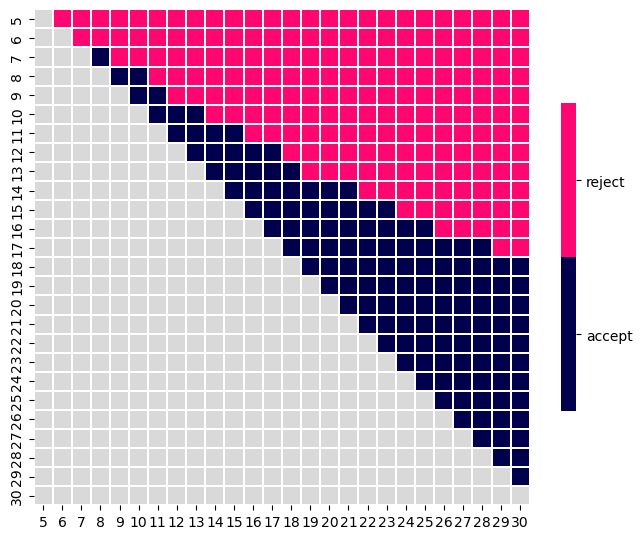

In [26]:
mregresdf = pe_analyzer.compute_entropy(order_list=[3,4])
processor = GetOptimalWindow(mregresdf)
win_len, psdf = processor.get_optimal_window()
processor.plot_heatmap(psdf)


In [53]:
print(f'Optimal window length for {loc} = {win_len} weeks')

Optimal window length for Virginia = 18 weeks


In [49]:
df=pd.read_csv('processed_data/alldata_combined_denoised.csv',parse_dates=['time_value'])
var_dict={'viral_activity_level':'VAL','hosp_fac_BOW_7d_avg':'Hosp.','dn_viral_activity_level':'VAL-dn'}
df=df.rename(columns=var_dict)
x1 = 'Hosp.'
x2 = 'VAL-dn'
loc = 'Virginia'
cols = ['geo_value', 'time_value', 'geo_res', x1, x2]
rdf = df[df.geo_value == loc][cols]


/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is d

2021-11-06 00:00:00 Insufficient observations. Maximum allowable lag is -1
2021-11-13 00:00:00 Insufficient observations. Maximum allowable lag is -1
2021-11-20 00:00:00 Insufficient observations. Maximum allowable lag is 0
2021-11-27 00:00:00 Insufficient observations. Maximum allowable lag is 0
2021-12-04 00:00:00 Insufficient observations. Maximum allowable lag is 0
2021-12-11 00:00:00 Insufficient observations. Maximum allowable lag is 1


/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/aa5dw/.local/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is d

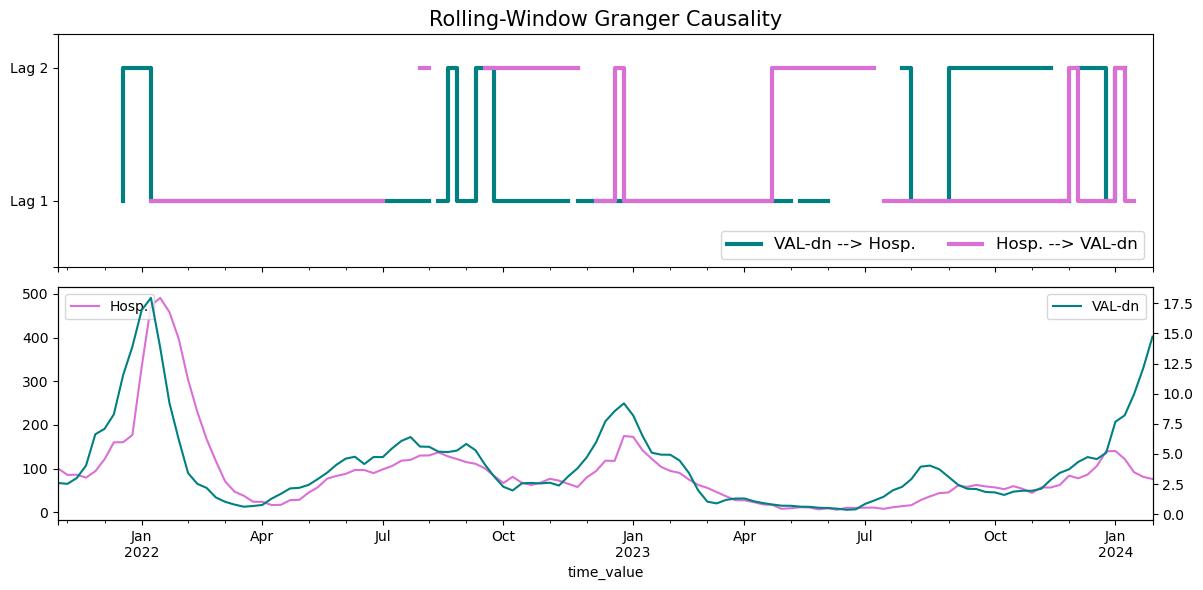

In [56]:
analyzer = GrangerCausalityAnalyzer(rdf, x1, x2)
gc_result = analyzer.rolling_GC_test(win=win_len);
analyzer.plot();


In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from BVAR import BayesianVARForecaster

df = pd.read_csv("input/data/alldata_combined_denoised.csv", parse_dates=["time_value"])
forecaster = BayesianVARForecaster(
    data=df,
    var_names=["hosp_fac_BOW_7d_avg", "dn_viral_activity_level"],
    location="VA",
    gtdate="2023-12-30",
    forecast_steps=4
)

forecaster.build_model()
forecaster.fit()
forecaster.generate_forecast(var_index=0)
forecaster.format_forecast(target_name="wk inc hosp_fac")
summary_df = forecaster.run_inference_summary()

ModuleNotFoundError: No module named 'pymc'